<a href="https://colab.research.google.com/github/Edebo/Art-Gallery-Management-System/blob/master/saleAnalysise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt

github_path = "https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_"

all_months_data = pd.DataFrame()
all_frames = []
total = 0
#import all data from github repo
for i in range(1,13):
  path = github_path + dt.date(2008, i, 1).strftime('%B')+ "_2019.csv"
  df = pd.read_csv(path)
  #df.info()
  len(df.index)
  #merge each file as the are read into one dataframe
  total+=len(df.index)
  #all_months_data =pd.concat([all_months_data,df],ignore_index=True)
  all_months_data = all_months_data.append(df,ignore_index=True)
print(all_months_data.info())

print(total)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
None
186850


In [ ]:
all_data =all_months_data.dropna(how="all")


In [ ]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


# Cleaning up data


In [ ]:
all_data.isnull().sum()
all_data=all_data.dropna()

df = all_data[all_data.duplicated(keep=False)]
all_data=all_data.drop_duplicates()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


# Q1. What Month had the best sales

In [ ]:
#doing cleaning first
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data = all_data[all_data["Month"]!="Or"]
all_data["Month"] = all_data["Month"].astype("int32")
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int32")
all_data["Price Each"] = all_data["Price Each"].astype(float)
all_data.info()

#next we group by month to answer the questions

all_data["Sale"] = all_data["Quantity Ordered"]*all_data["Price Each"]
month_sales =all_data.groupby("Month").sum()
month_sales





<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int32  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Month             185686 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


,Quantity Ordered,Price Each,Sale
Month,,,
1,10893,1.810925e+06,1.821413e+06
2,13431,2.186940e+06,2.200078e+06
3,16979,2.789085e+06,2.804973e+06
4,20536,3.366219e+06,3.389218e+06
5,18653,3.133135e+06,3.150616e+06
6,15234,2.560504e+06,2.576280e+06
7,16054,2.631225e+06,2.646461e+06
8,13429,2.226964e+06,2.241083e+06
9,13091,2.081898e+06,2.094466e+06


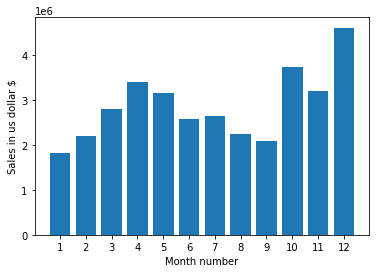

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,month_sales["Sale"])
plt.xticks(months)

plt.ylabel("Sales in us dollar $")
plt.xlabel("Month number")
plt.show()



#What US city had the highest number of sales



In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [ ]:
def get_cities(x):
  return x.split(",")[1]

def get_address(x):
  return x.split(",")[2].split(" ")[1]

all_data["City"] =all_data["Purchase Address"].apply(lambda x:f"{get_cities(x)}({get_address(x)})")

result = all_data.groupby("City").sum()
result




,Quantity Ordered,Price Each,Month,Sale
City,,,,
Atlanta(GA),16584,2.778609e+06,104649,2.794199e+06
Austin(TX),11137,1.808340e+06,69720,1.818044e+06
Boston(MA),22494,3.634398e+06,140898,3.658628e+06
Dallas(TX),16707,2.750026e+06,104447,2.765374e+06
Los Angeles(CA),33247,5.417172e+06,208020,5.448304e+06
New York City(NY),27903,4.632921e+06,175557,4.661867e+06
Portland(ME),2746,4.467524e+05,17119,4.493214e+05
Portland(OR),11291,1.859836e+06,70517,1.870011e+06
San Francisco(CA),50169,8.204001e+06,314949,8.254744e+06


In [ ]:
cities = [city for city,df in all_data.groupby("City")]
cities

[' Atlanta(GA)',
 ' Austin(TX)',
 ' Boston(MA)',
 ' Dallas(TX)',
 ' Los Angeles(CA)',
 ' New York City(NY)',
 ' Portland(ME)',
 ' Portland(OR)',
 ' San Francisco(CA)',
 ' Seattle(WA)']

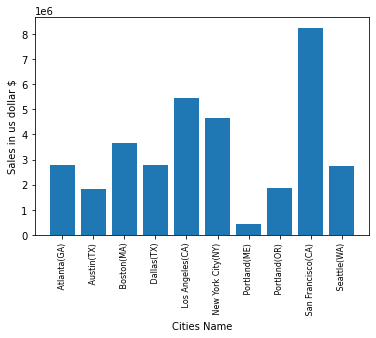

In [ ]:
plt.bar(cities,result["Sale"])
plt.xticks(cities,rotation="vertical",size=8)

plt.ylabel("Sales in us dollar $")
plt.xlabel("Cities Name")
plt.show()

What time is the best to advertise


In [ ]:
all_data["Hour"] = pd.to_datetime(all_data["Order Date"]).dt.hour

In [ ]:
hours= [hour for hour,df in all_data.groupby("Hour")]

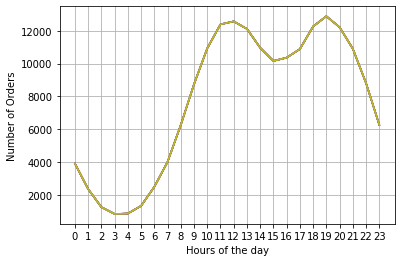

In [ ]:
plt.plot(hours,all_data.groupby("Hour").count())
plt.xticks(hours)
plt.xlabel("Hours of the day")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

In [ ]:
df =all_data[all_data["Order ID"].duplicated(keep=False)]

df = df.groupby('Order ID').agg({'Product': ', '.join}).reset_index()
#df = df[["Order ID","Grouped"]].drop_duplicates()
#df = df.groupby(['Order ID'])['Product'].apply(', '.join).reset_index()
df

,Order ID,Product
0,141275,"USB-C Charging Cable, Wired Headphones"
1,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
2,141365,"Vareebadd Phone, Wired Headphones"
3,141384,"Google Phone, USB-C Charging Cable"
4,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop, Wired Headphones"
6875,319556,"Google Phone, Wired Headphones"
6876,319584,"iPhone, Wired Headphones"
6877,319596,"iPhone, Lightning Charging Cable"


In [ ]:
#df.groupby("Product").size()
kd = df.groupby('Product')['Order ID'].nunique().sort_values(ascending=False).reset_index(name='count')
kd

,Product,count
0,"iPhone, Lightning Charging Cable",886
1,"Google Phone, USB-C Charging Cable",857
2,"iPhone, Wired Headphones",361
3,"Vareebadd Phone, USB-C Charging Cable",312
4,"Google Phone, Wired Headphones",303
...,...,...
345,"LG Washing Machine, 20in Monitor",1
346,"LG Washing Machine, 27in 4K Gaming Monitor",1
347,"LG Washing Machine, AA Batteries (4-pack)",1
348,"LG Washing Machine, Apple Airpods Headphones",1


In [ ]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston(MA),21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland(OR),14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco(CA),13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles(CA),20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin(TX),11


What product was sold the most and why?

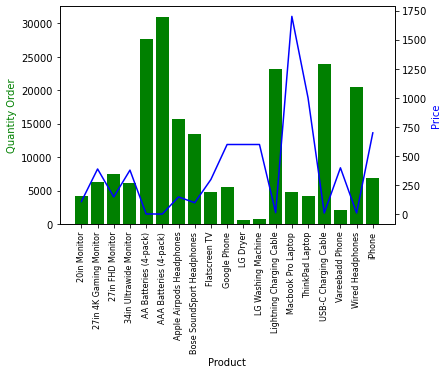

In [ ]:
group_product = all_data.groupby("Product").sum()
group_product = group_product[["Quantity Ordered","Price Each"]]
qty_order = group_product["Quantity Ordered"]
products = [product for product,df in all_data.groupby("Product")]
price = all_data.groupby("Product").mean()["Price Each"]


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, qty_order,color='g')
ax2.plot(products, price, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Order', color='g')
ax2.set_ylabel('Price', color='b')

ax1.set_xticklabels(products,rotation="vertical",size=8)
plt.show()


In [ ]:
correlation = qty_order.corr(price)
correlation

-0.6012969062599514